Q1. What is the mathematical formula for a linear SVM?

Ans.
min 1/2 * ||w||^2 + C * sum(max(0, 1 - yi * (w' * xi + b)))
                                        
w is the weight vector
b is the bias term
C is a hyperparameter that controls the trade-off between minimizing the training error and maximizing the margin
yi is the label for the i-th training example
xi is the i-th training example

Q2. What is the objective function of a linear SVM?

Ans.
min 1/2 * ||w||^2 + C * sum(max(0, 1 - yi * w' * xi))

Q3. What is the kernel trick in SVM?

Ans.

The kernel trick is a technique in machine learning that allows SVMs to be used for non-linear classification problems. The kernel trick works by mapping the data points into a higher dimensional space, where the data points may be linearly separable. The mapping is done using a kernel function, which is a function that measures the similarity between two data points

1. The linear kernel: This kernel function simply computes the dot product of two data points.
2. The polynomial kernel: This kernel function computes a polynomial of the dot product of two data points.
3. The radial basis function kernel (RBF): This kernel function computes an exponential function of the distance between two data points.

Q4. What is the role of support vectors in SVM Explain with example

Ans.
Support vectors are the data points that are closest to the hyperplane in a support vector machine (SVM). They play a critical role in the SVM algorithm, as they are the points that determine the position and orientation of the hyperplane.


Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Ans.

Hyperplane
A hyperplane is a flat subspace that divides a space into two halfspaces. In SVM, the hyperplane is used to separate two classes of data points.

Marginal plane
The marginal plane is the hyperplane that is equidistant to the two classes of data points. The margin is the distance between the hyperplane and the closest data points.

Soft margin
A soft margin SVM allows some data points to be misclassified, while still trying to maximize the margin. This is done by introducing a slack variable to the objective function.

Hard margin
A hard margin SVM does not allow any data points to be misclassified. This means that the hyperplane must pass through all of the support vectors.


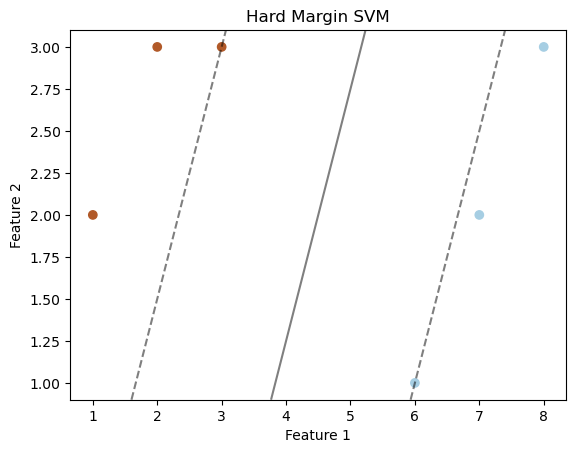

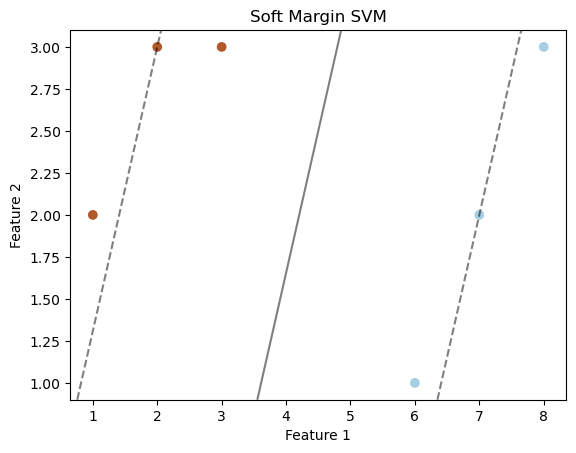

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create a simple dataset
X = np.array([[1, 2], [2, 3], [3, 3], [6, 1], [7, 2], [8, 3]])
y = np.array([1, 1, 1, -1, -1, -1])

# Fit a hard margin SVM
hard_clf = svm.SVC(kernel='linear', C=1e10)
hard_clf.fit(X, y)

# Fit a soft margin SVM
soft_clf = svm.SVC(kernel='linear', C=0.1)
soft_clf.fit(X, y)

# Plotting function
def plot_svm(clf, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the hard margin SVM
plot_svm(hard_clf, 'Hard Margin SVM')

# Plot the soft margin SVM
plot_svm(soft_clf, 'Soft Margin SVM')


Q6. SVM Implementation through Iris dataset.

~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.


In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [7]:
import pandas as pd
df = pd.DataFrame(dataset.data , columns = dataset.feature_names)
df['Target'] = dataset.target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20 , random_state = 42)

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [11]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
y_pred = svc.predict(X_test)

In [15]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
score = r2_score(y_test,y_pred)
print("score is " , score)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

score is  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Figure size 1200x1000 with 0 Axes>

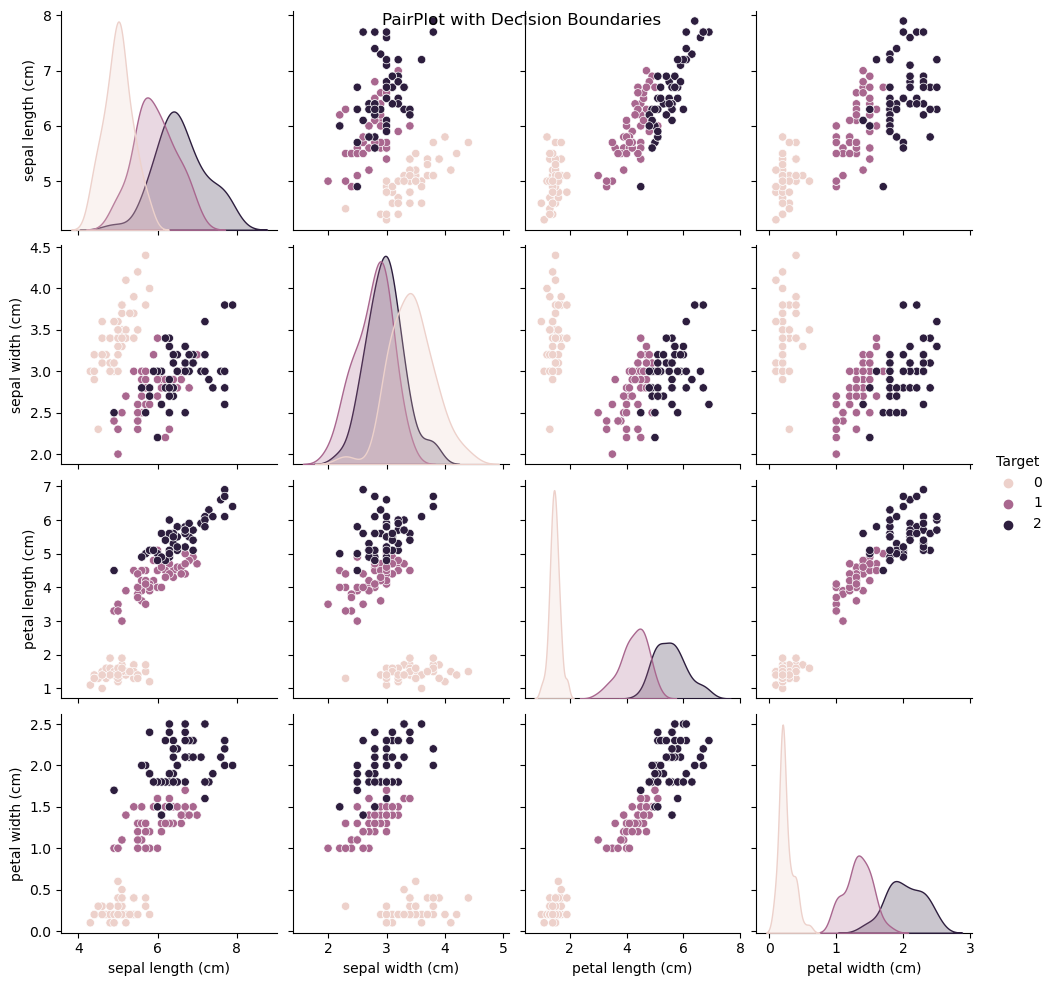

In [46]:
# Create a pair plot to visualize decision boundaries for each pair of features
import seaborn as sns
plt.figure(figsize = (12,10))
sns.pairplot(data = df, hue='Target', diag_kind='kde')
plt.suptitle('PairPlot with Decision Boundaries')
plt.show()

In [48]:
# Try different values of the regularization parameter C
C_values = [0.1, 1, 10, 100]
for C in C_values:
    # Train a linear SVM classifier
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train, y_train)

    # Predict labels for the testing set
    y_pred = svc.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

1.0
1.0
0.9666666666666667
1.0


In [ ]:
Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)


In [71]:
df1 = pd.DataFrame(X)[0]

<AxesSubplot: xlabel='0', ylabel='1'>

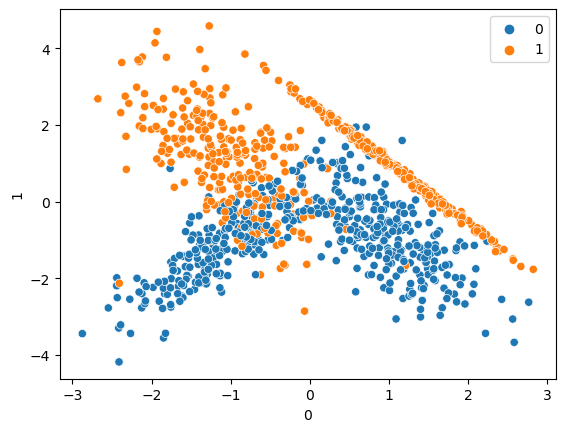

In [72]:
sns.scatterplot(x = df1 , y = pd.DataFrame(X)[1], hue = y)

In [73]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')

In [74]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [75]:
y_pred1 = svc.predict(X_test)

In [76]:
y_pred1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [77]:
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
score = r2_score(y_test,y_pred1)
print("score is " , score)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

score is  1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
